### Veri okuma

In [1]:
import pandas as pd

veri=pd.read_csv("duygu.csv")

### Negatif ve pozitif türkçe yazma

In [ ]:
veri["Duygu"]=veri["Duygu"].replace({"negative":"Negatif","positive":"Pozitif"})

### Pozitif ve negatif bar grafik

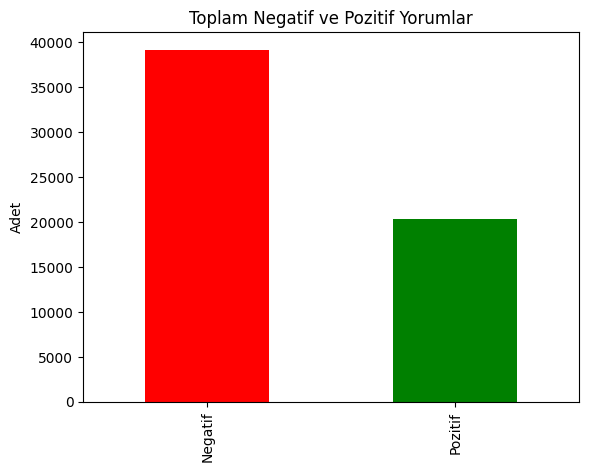

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

say=veri["Duygu"].value_counts()

say.plot(kind="bar",color=["red","green"])
plt.title("Toplam Negatif ve Pozitif Yorumlar")
plt.xlabel("")
plt.ylabel("Adet")
plt.show()

### Firmalara Göre Duygu

### Öncelikle yorum sayısı belirli sayının altında olanları silelim

### Örneğin firmanın 3 yorumu varsa üçüde pozitif ise bu %100 pozitif verse de güvenilir olmaz

### Firma yorum sayıları

In [18]:
import plotly.express as px

grup=veri.groupby("Firma Adı").size().reset_index(name="Toplam Yorum")

fig=px.scatter(grup,x=grup.index,y="Toplam Yorum", 
                 hover_name="Firma Adı",size="Toplam Yorum",size_max=30)

fig.update_layout(
    title="Firmaların Toplam Yorum Sayıları",
    xaxis_title="",
    yaxis_title="Adet",
    xaxis=dict(showticklabels=False))

fig.show()

### 50 yorumun altındakiler silinsin ve geriye kalanların yorum oranlarını görelim

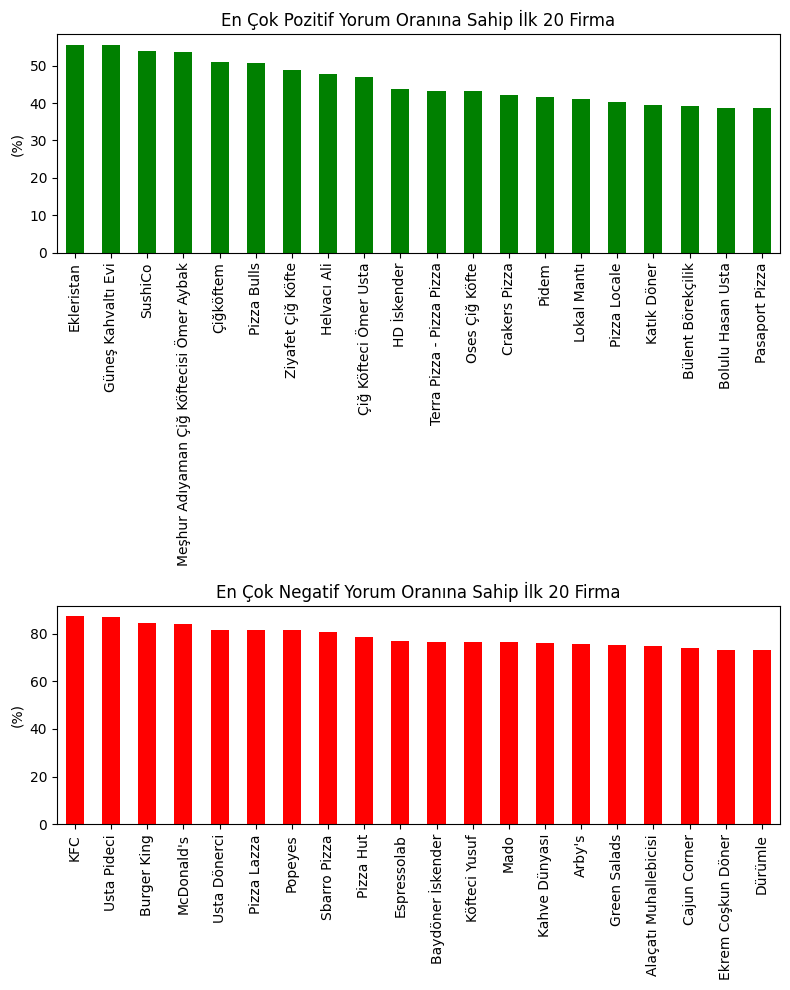

In [24]:
import matplotlib.pyplot as plt

grup=veri.groupby(["Firma Adı","Duygu"]).size().unstack(fill_value=0)

grup["Toplam"]=grup["Negatif"]+grup["Pozitif"]
grup = grup[grup["Toplam"]>=100]
grup["Negatif Oran (%)"]=(grup["Negatif"]/grup["Toplam"])*100
grup["Pozitif Oran (%)"]=(grup["Pozitif"]/grup["Toplam"])*100


pozitif20=grup.nlargest(20,"Pozitif Oran (%)")
negatif20=grup.nlargest(20,"Negatif Oran (%)")

fig,axes=plt.subplots(nrows=2,ncols=1,figsize=(8,10))

pozitif20["Pozitif Oran (%)"].plot(kind="bar",ax=axes[0],color="green")
axes[0].set_title("En Çok Pozitif Yorum Oranına Sahip İlk 20 Firma")
axes[0].set_xlabel("")
axes[0].set_ylabel("(%)")

negatif20["Negatif Oran (%)"].plot(kind="bar",ax=axes[1],color="red")
axes[1].set_title("En Çok Negatif Yorum Oranına Sahip İlk 20 Firma")
axes[1].set_xlabel("")
axes[1].set_ylabel("(%)")

plt.tight_layout()
plt.show()